In [2]:
import act
from datetime import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np 
from netCDF4 import Dataset
import pandas as pd
import xarray as xr

# Set your username and token here!
# Read more on how to retrive your token:
# https://arm-doe.github.io/ACT/API/generated/act.discovery.download_arm_data.html#act.discovery.download_arm_data
username = ''
token = ''

datastream = "anxaosccnsmpskappaM1.c1"
target_variable='N_CCN'
# Read NetCDF files
from datetime import datetime
startdate = '2020-03-09'
enddate = '2020-03-16'
files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(files)

[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200310.002602.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200309.003204.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200313.003849.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200311.022138.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200312.013206.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200315.000427.nc
[DOWNLOADING] anxaosccnsmpskappaM1.c1.20200314.005637.nc

If you use these data to prepare a publication, please cite:

Kulkarni, G., Levin, M., & Shilling, J. CCN Counter derived hygroscopicity
parameter kappa (AOSCCNSMPSKAPPA). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1729907



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
supersaturation_calculated = ds['supersaturation_calculated'].values
print(supersaturation_calculated)

[0.03772254 0.9527876  0.03713164 0.03777312 0.94265825 0.0361128
 0.03590171 0.03865974 0.9207752  0.03613326 0.93762916 0.03730469
 0.9415967  0.03776084 0.9488468  0.03797971 0.03802646 0.03895507
 0.03673649 0.03726097 0.0406676  0.03826233 0.03813892 0.04080067
 0.03805974 0.04057948 0.03703631 0.04065845 0.03812022 0.0408215
 0.03800975 0.03791384 0.04085224 0.04068534 0.03789597 0.04061534
 0.04012176 0.03699951 0.03873016 0.03839283 0.03811702 0.03866894
 0.0388497  0.03886029 0.036304   0.03663572 0.03961685 0.03700327
 0.03994245 0.03995067 0.03732248 0.03755617 0.95262843 0.03858808
 0.03908711 0.03649596 0.03973068 0.04004772 0.04068363 0.03781965
 0.03791812 0.03996408 0.03892046 0.03848799 0.9573314  0.0359726
 0.03940228 0.9628967  0.03662299 0.03983196 0.03893958 0.03759156
 0.04076935 0.04187626 0.03838104 0.04019907 0.04114968 0.03964654
 0.0420416  0.04223079 0.0405227  0.03694268 0.03942828 0.0393893
 0.03839598 0.04250516 0.03967811 0.03885743 0.03858862 0.7361764


In [4]:
# Apply quality control where qc_N_CCN > 0
ds_filtered = ds.where(ds['qc_N_CCN'] == 0)
#ds_filtered.clean.cleanup()  #No qc in that time period
#ds_filtered = act.qc.arm.add_dqr_to_qc(ds_filtered)
#ds_filtered.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

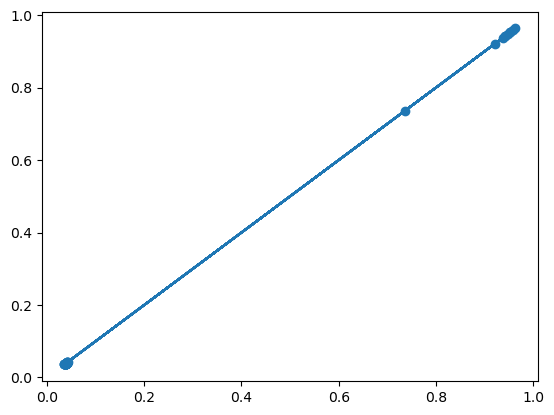

In [5]:
supersaturation_calculated = ds_filtered['supersaturation_calculated']
supersaturation_calculated.values
plt.plot(ds_filtered['supersaturation_calculated'].values, ds_filtered['supersaturation_calculated'].values, marker='o', linestyle='-')

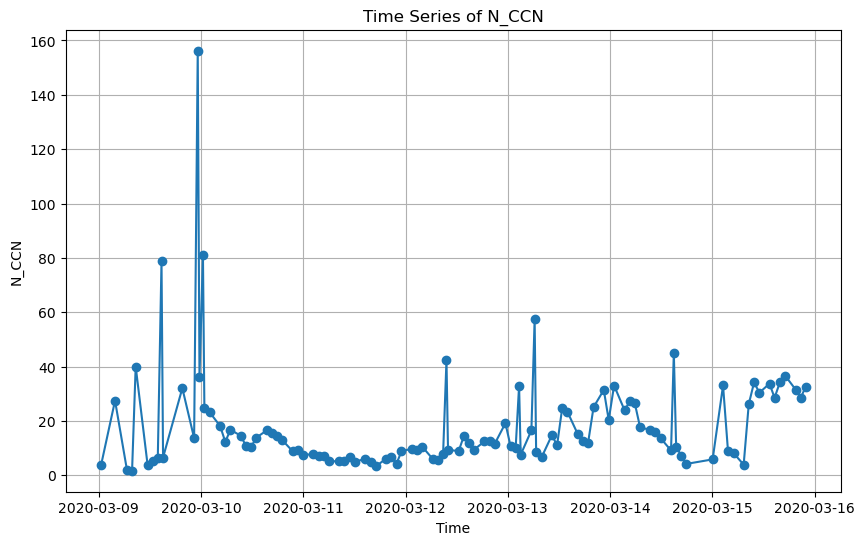

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(ds_filtered['time'].values, ds_filtered['N_CCN'].values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('N_CCN')
plt.title('Time Series of N_CCN')
plt.grid(True)
plt.show()

In [54]:
ds_filtered

<xarray.Dataset> Size: 471kB
Dimensions:                          (time: 108, bound: 2,
                                      diameter_mobility: 192, droplet_size: 20,
                                      setpoint: 7)
Coordinates:
  * time                             (time) datetime64[ns] 864B 2020-03-09T00...
  * diameter_mobility                (diameter_mobility) float32 768B 1.02 .....
  * droplet_size                     (droplet_size) float32 80B 0.0 1.0 ... 19.0
  * setpoint                         (setpoint) float32 28B 0.0 0.1 ... 0.8 1.0
Dimensions without coordinates: bound
Data variables: (12/22)
    base_time                        (time) datetime64[ns] 864B dask.array<chunksize=(14,), meta=np.ndarray>
    time_offset                      (time) datetime64[ns] 864B dask.array<chunksize=(14,), meta=np.ndarray>
    time_bounds                      (time, bound) object 2kB dask.array<chunksize=(14, 2), meta=np.ndarray>
    diameter_mobility_bounds         (time, diameter_mobility, bound) float32 166kB dask.array<chunksize=(14, 192, 2), meta=np.ndarray>
    droplet_size_bounds              (time, droplet_size, bound) float32 17kB dask.array<chunksize=(14, 20, 2), meta=np.ndarray>
    kappa                            (time) float32 432B dask.array<chunksize=(14,), meta=np.ndarray>
    ...                               ...
    qc_N_CCN_dN                      (time, droplet_size) float64 17kB dask.array<chunksize=(14, 20), meta=np.ndarray>
    dN_dlogDp                        (time, diameter_mobility) float32 83kB dask.array<chunksize=(14, 192), meta=np.ndarray>
    qc_dN_dlogDp                     (time, diameter_mobility) float64 166kB dask.array<chunksize=(14, 192), meta=np.ndarray>
    lat                              (time) float32 432B dask.array<chunksize=(14,), meta=np.ndarray>
    lon                              (time) float32 432B dask.array<chunksize=(14,), meta=np.ndarray>
    alt                              (time) float32 432B dask.array<chunksize=(14,), meta=np.ndarray>
Attributes: (12/17)
    command_line:          aosccnsmpskappa -n aosccnsmpskappa -s anx -f M1 -b...
    Conventions:           ARM-1.3
    process_version:       aosccnsmpskappa-1.2.0
    dod_version:           aosccnsmpskappa-c1-1.2
    input_datastreams:     anxaosccn2colaavgM1.b1 : 2.1 : 20200309.003204\nan...
    site_id:               anx
    ...                    ...
    doi:                   10.5439/1729907
    history:               created by user levin on machine prod-proc5.adc.ar...
    _file_dates:           ['20200309', '20200310', '20200311', '20200312', '...
    _file_times:           ['003204', '002602', '022138', '013206', '003849',...
    _datastream:           anxaosccnsmpskappaM1.c1
    _arm_standards_flag:   1

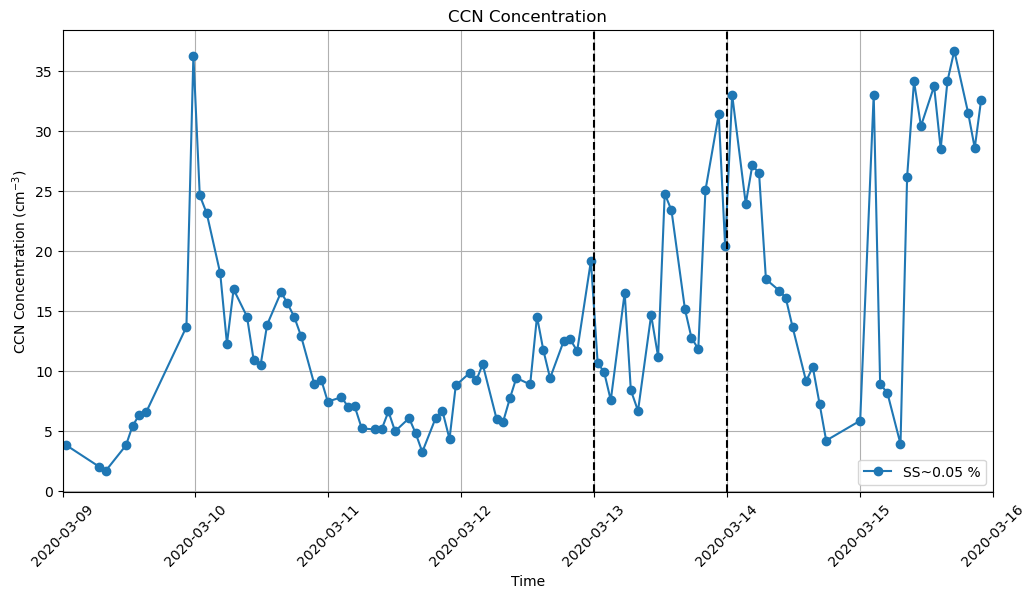

In [7]:

index_1 = ((ds_filtered['supersaturation_calculated'] >= 0) & 
           (ds_filtered['supersaturation_calculated'] <= 0.1)).compute()

index_2 = ((ds_filtered['supersaturation_calculated'] > 0.6) & 
           (ds_filtered['supersaturation_calculated'] <= 2)).compute()

ds_filtered_1 = ds_filtered.where(index_1, drop=True)
ds_filtered_2 = ds_filtered.where(index_2, drop=True)

times_1 = ds_filtered_1['time'].values
concentrations_1 = ds_filtered_1[target_variable].values

times_2 = ds_filtered_2['time'].values
concentrations_2 = ds_filtered_2[target_variable].values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times_1, concentrations_1,marker='o', label='SS~0.05 %')
#ax.plot(times_2, concentrations_2,marker='o', label='SS~0.95')

ax.set_title('CCN Concentration')
ax.set_xlabel('Time')
ax.set_ylabel('CCN Concentration (cm$^{-3}$)')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

ax.axvline(x=np.datetime64('2020-03-13 00:00:00'), color='k', linestyle='--')
ax.axvline(x=np.datetime64('2020-03-14 00:00:00'), color='k', linestyle='--')
ax.set_xlim(np.datetime64('2020-03-09 00:00:00'), np.datetime64('2020-03-16 00:00:00'))

plt.savefig('CCN_concentration.png')

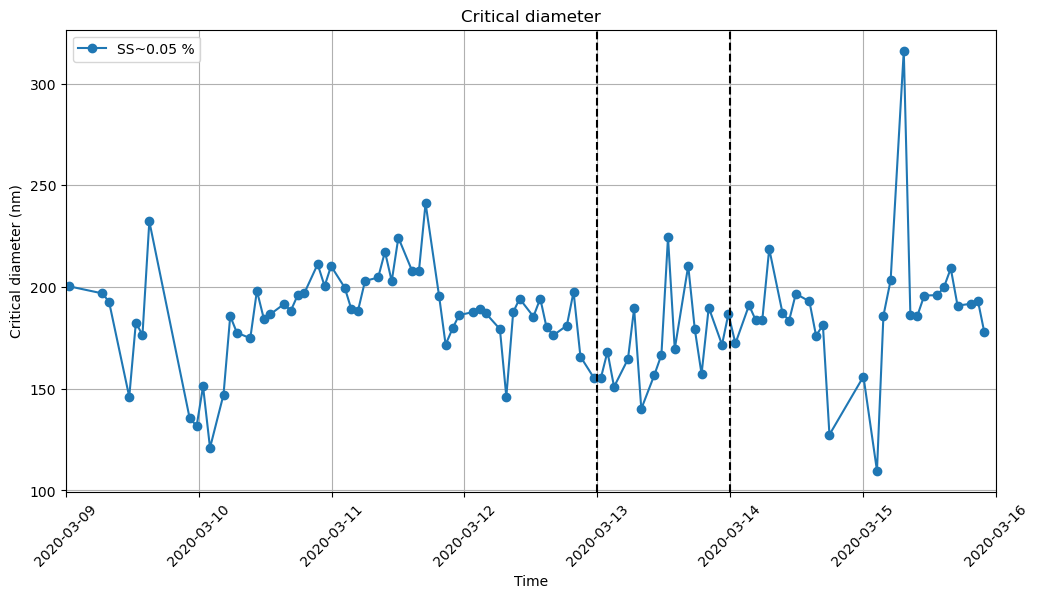

In [8]:
# Plot the critical diameter

times_1 = ds_filtered_1['time'].values
concentrations_1 = ds_filtered_1['critical_diameter'].values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times_1, concentrations_1,marker='o', label='SS~0.05 %')

ax.set_title('Critical diameter')
ax.set_xlabel('Time')
ax.set_ylabel('Critical diameter (nm)')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

ax.axvline(x=np.datetime64('2020-03-13 00:00:00'), color='k', linestyle='--')
ax.axvline(x=np.datetime64('2020-03-14 00:00:00'), color='k', linestyle='--')
ax.set_xlim(np.datetime64('2020-03-09 00:00:00'), np.datetime64('2020-03-16 00:00:00'))

plt.savefig('Critical_diameter.png')

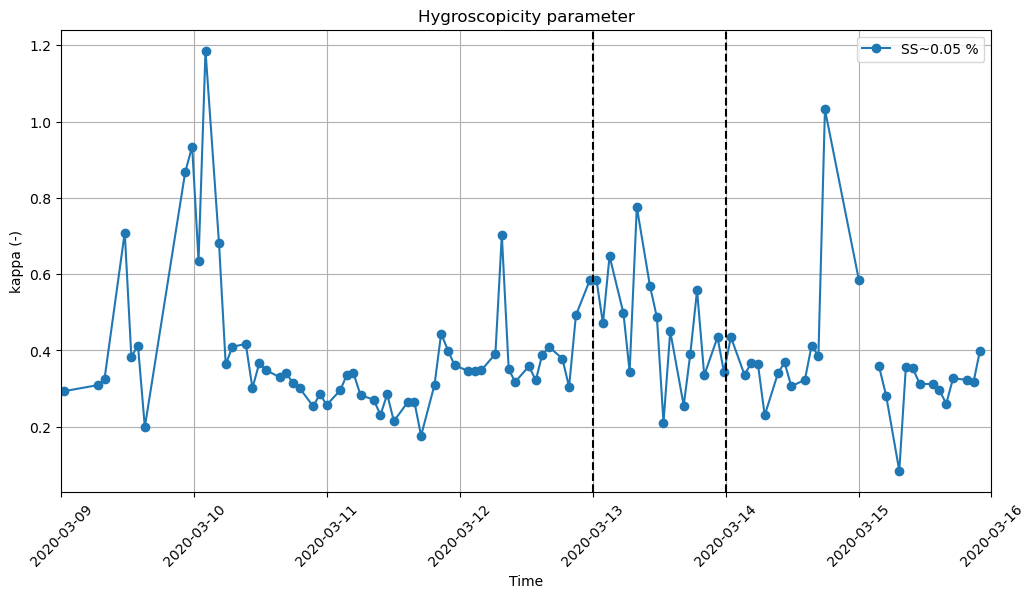

In [9]:
#Plot the hygroscopicity

times_1 = ds_filtered_1['time'].values
concentrations_1 = ds_filtered_1['kappa'].values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(times_1, concentrations_1,marker='o', label='SS~0.05 %')

ax.set_title('Hygroscopicity parameter')
ax.set_xlabel('Time')
ax.set_ylabel('kappa (-)')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

ax.axvline(x=np.datetime64('2020-03-13 00:00:00'), color='k', linestyle='--')
ax.axvline(x=np.datetime64('2020-03-14 00:00:00'), color='k', linestyle='--')
ax.set_xlim(np.datetime64('2020-03-09 00:00:00'), np.datetime64('2020-03-16 00:00:00'))

plt.savefig('kappa.png')

In [323]:
# Analysing particle size distirbution
diam = ds_filtered['dN_dlogDp']
diam.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [22]:
ds_filtered_smps = ds.where((ds['qc_dN_dlogDp'] == 0))

for day in np.unique(ds_filtered['time.day'].values):
    ds_day = ds_filtered.where(ds_filtered['time.day'] == day, drop=True)
    daily_means = ds_day.mean(dim='time')
    
    diameter_mobility = daily_means['diameter_mobility'].values
    dN_dlogDp_mean = daily_means['dN_dlogDp'].values
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(diameter_mobility, dN_dlogDp_mean, marker='o', linestyle='-', color='b')

    ax.set_xlabel('Diameter (nm)')
    ax.set_ylabel('dN_dlogDp')
    ax.set_ylim((0,350))   # set the ylim to bottom, top
    formatted_day = datetime(2020, 3, int(day))  # Assuming the year 2020 and month March
    ax.set_title(formatted_day.strftime("%Y-%m-%d")) 
    plt.tight_layout()
    plt.savefig(f'plot_{formatted_day.strftime("%Y-%m-%d")}.png')
    plt.close()
    plt.show()

#    plt.savefig('all_plots.png')

In [24]:
# Aerosol total particle concentration (CPC) in NSA

datastream = "nsaaoscpcX1.b1"
target_variable='concentration'
# Read NetCDF files
from datetime import datetime
startdate = '2016-11-01'
enddate = '2016-11-09'
files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_cpc = act.io.read_arm_netcdf(files)

[DOWNLOADING] nsaaoscpcX1.b1.20161102.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161103.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161101.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161104.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161105.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161107.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161106.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161109.000000.nc
[DOWNLOADING] nsaaoscpcX1.b1.20161108.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Andrews, E., Kuang, C., Hayes, C., Singh, A., & Salwen, C.
Condensation Particle Counter (AOSCPC). Atmospheric Radiation Measurement (ARM)
User Facility. https://doi.org/10.5439/1227962



In [26]:
ds_cpc

<xarray.Dataset> Size: 933kB
Dimensions:                     (time: 12960, bound: 2)
Coordinates:
  * time                        (time) datetime64[ns] 104kB 2016-11-01 ... 20...
Dimensions without coordinates: bound
Data variables:
    base_time                   (time) datetime64[ns] 104kB 2016-11-01 ... 20...
    time_offset                 (time) datetime64[ns] 104kB 2016-11-01 ... 20...
    time_bounds                 (time, bound) object 207kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    concentration               (time) float32 52kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_concentration            (time) int32 52kB dask.array<chunksize=(1440,), meta=np.ndarray>
    f2_flags                    (time) int32 52kB dask.array<chunksize=(1440,), meta=np.ndarray>
    cpc_flow                    (time) float32 52kB 0.986 0.986 ... 0.986 0.986
    dilution_correction_factor  (time) float32 52kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                         (time) float32 52kB 71.32 71.32 ... 71.32 71.32
    lon                         (time) float32 52kB -156.6 -156.6 ... -156.6
    alt                         (time) float32 52kB 11.0 11.0 11.0 ... 11.0 11.0
Attributes: (12/23)
    command_line:                aosdilutioncorr -s nsa -f X1 -b 20160820 -e ...
    Conventions:                 ARM-1.1
    process_version:             ingest-aosdilutioncorr-1.7-0.el6
    dod_version:                 aoscpc-b1-1.7
    site_id:                     nsa
    facility_id:                 X1
    ...                          ...
    doi:                         10.5439/1227962
    history:                     created by user dsmgr on machine ruby at 201...
    _file_dates:                 ['20161101', '20161102', '20161103', '201611...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 nsaaoscpcX1.b1
    _arm_standards_flag:         1

In [28]:
# Apply quality control where qc_concentration > 0
ds_cpc_filtered = ds_cpc.where(ds_cpc['qc_concentration'] == 0)

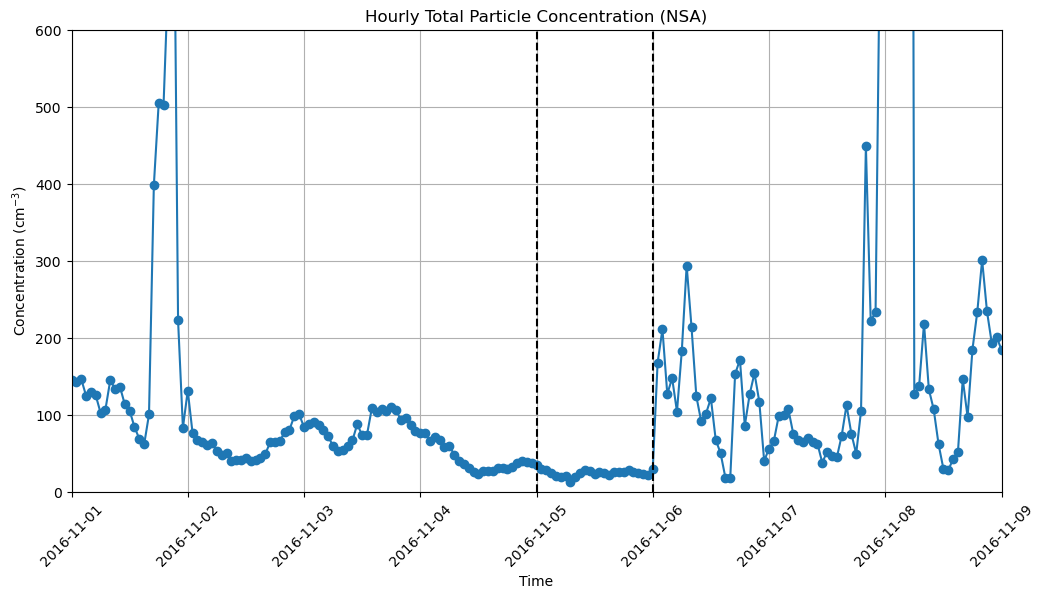

In [53]:
#Plot the time series concentration
#Hourly mean values of concentration calculation

time_values = ds_cpc_filtered['time'].values
concentration_values = ds_cpc_filtered['concentration'].values

df = pd.DataFrame({
    'time': pd.to_datetime(time_values),
    'concentration': concentration_values
})
df.set_index('time', inplace=True)

df_hourly = df.resample('H').mean()

#Plot
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['concentration'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Concentration (cm$^{-3}$)')
plt.title('Hourly Total Particle Concentration (NSA)')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0,600)

plt.axvline(x=np.datetime64('2016-11-05 00:00:00'), color='k', linestyle='--')
plt.axvline(x=np.datetime64('2016-11-06 00:00:00'), color='k', linestyle='--')
plt.xlim(np.datetime64('2016-11-01 00:00:00'), np.datetime64('2016-11-09 00:00:00'))

plt.savefig('Concentration_NSA(hourly).png')
